# Data Distributions

In [1]:
# Read data
import json_lines
X = []
y = []
z = []
with open('data.txt', 'rb') as f:
    for item in json_lines.reader(f):
        X.append(item['text'])
        y.append(item['voted_up'])
        z.append(item['early_access'])

In [2]:
from langdetect import detect

langs = {}

for i in range(len(X)):
    text = X[i]
    try:
        lang = detect(text)
    except:
        lang = '?'
    
    try:
        langs[lang] = langs[lang] + 1
    except:
        langs[lang] = 0
        
langs

{'zh-cn': 125,
 'en': 2052,
 'tr': 254,
 'af': 39,
 'bg': 45,
 'de': 199,
 'tl': 43,
 'ru': 830,
 'es': 173,
 'pt': 205,
 'it': 29,
 'pl': 107,
 'symb': 113,
 'fr': 91,
 'sq': 6,
 'ro': 22,
 'sk': 17,
 'so': 82,
 'vi': 13,
 'sl': 20,
 'da': 22,
 'cy': 24,
 'no': 18,
 'ja': 27,
 'th': 20,
 'ko': 107,
 'et': 17,
 'hr': 27,
 'hu': 31,
 'mk': 30,
 'ca': 21,
 'uk': 23,
 'id': 22,
 'fi': 6,
 'nl': 45,
 'cs': 25,
 'sw': 15,
 'sv': 6,
 'lv': 4,
 'lt': 0,
 'zh-tw': 4}

In [26]:
langs['?'] = langs.pop('n/a')

In [51]:
langs.items()

dict_items([('zh-cn', [71, 58]), ('en', [1107, 951]), ('tr', [131, 123]), ('af', [8, 33]), ('bg', [25, 26]), ('de', [107, 95]), ('tl', [17, 24]), ('ru', [436, 388]), ('es', [77, 97]), ('pt', [85, 118]), ('it', [14, 15]), ('pl', [47, 61]), ('fr', [46, 47]), ('sq', [4, 4]), ('ro', [5, 17]), ('sk', [8, 9]), ('so', [19, 64]), ('vi', [5, 7]), ('sl', [6, 14]), ('da', [5, 12]), ('cy', [11, 15]), ('no', [12, 6]), ('ja', [10, 17]), ('th', [9, 11]), ('ko', [64, 43]), ('et', [5, 12]), ('hr', [7, 19]), ('hu', [15, 16]), ('mk', [15, 14]), ('ca', [7, 11]), ('uk', [13, 11]), ('id', [14, 9]), ('fi', [4, 1]), ('nl', [26, 18]), ('cs', [13, 11]), ('sw', [5, 9]), ('sv', [3, 3]), ('lv', [3, 1]), ('lt', [1, 2]), ('zh-tw', [2, 0]), ('?', [37, 78])])

In [ ]:
from langdetect import detect

# Count number of y=True and z=True for each language

lang_count = {}

for i in range(len(X)):
    text = X[i]
    voted = y[i]
    try:
        lang = detect(text)
    except:
        lang = '?'
    
    try:
        lang_count[lang][voted] = lang_count[lang][voted] + 1
    except:
        if voted:
            lang_count[lang] = [0, 1]
        else:
            lang_count[lang] = [1, 0]

In [52]:
lang_count_sorted = {k: v for k, v in sorted(lang_count.items(), key=lambda item: sum(item[1]), reverse=True)}

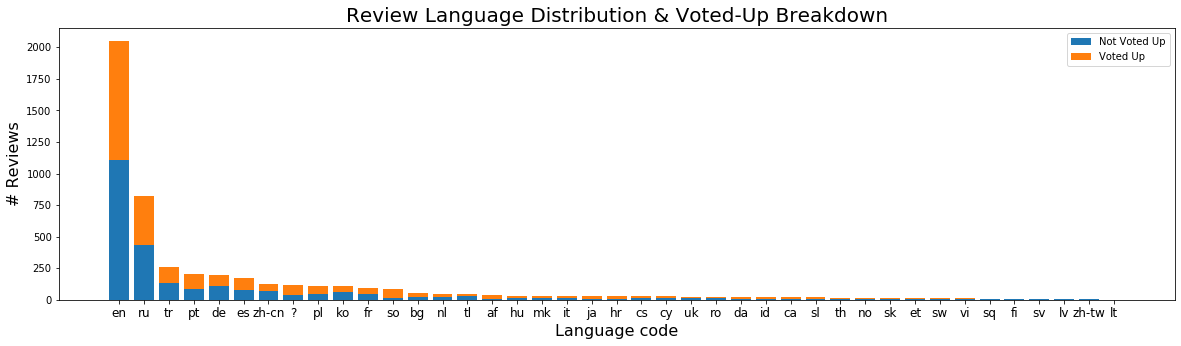

In [71]:
import matplotlib.pyplot as plt

not_voted = [item[1][0] for item in lang_count_sorted.items()]
voted = [item[1][1] for item in lang_count_sorted.items()]

plt.bar(range(len(langs_sorted)), not_voted, align='center')
plt.bar(range(len(langs_sorted)), voted, bottom=not_voted, align='center')
plt.xticks(range(len(langs_sorted)), list(langs_sorted.keys()))
plt.xlabel('Language code', fontsize=16)
plt.ylabel('# Reviews', fontsize=16)
plt.title('Review Language Distribution & Voted-Up Breakdown', fontsize=20)
plt.legend(('Not Voted Up', 'Voted Up'))
plt.gcf().set_size_inches(20, 5)
plt.show()

In [63]:
from langdetect import detect

# Count number of y=True and z=True for each language

lang_count_early = {}

for i in range(len(X)):
    text = X[i]
    early = z[i]
    try:
        lang = detect(text)
    except:
        lang = '?'
    
    try:
        lang_count_early[lang][early] = lang_count_early[lang][early] + 1
    except:
        if early:
            lang_count_early[lang] = [0, 1]
        else:
            lang_count_early[lang] = [1, 0]

In [64]:
lang_count_early_sorted = {k: v for k, v in sorted(lang_count_early.items(), key=lambda item: sum(item[1]), reverse=True)}

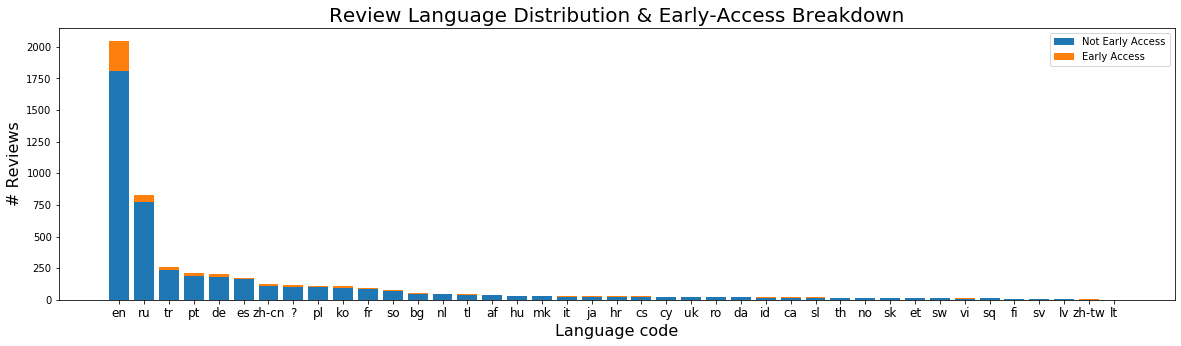

In [70]:
not_early = [item[1][0] for item in lang_count_early_sorted.items()]
early = [item[1][1] for item in lang_count_early_sorted.items()]

plt.bar(range(len(langs_sorted)), not_early, align='center')
plt.bar(range(len(langs_sorted)), early, bottom=not_early, align='center')
plt.xticks(range(len(langs_sorted)), list(langs_sorted.keys()))
plt.xlabel('Language code', fontsize=16)
plt.ylabel('# Reviews', fontsize=16)
plt.title('Review Language Distribution & Early-lAccess Breakdown', fontsize=20)
plt.legend(('Not Early Access', 'Early Access'))
plt.gcf().set_size_inches(20, 5)
plt.show()

In [83]:
big_string = ''
for x in X:
    big_string += x

# Word Clouds
- Word cloud without pre-processing (i.e. translation & stop-word removal) isn't very meaningful.

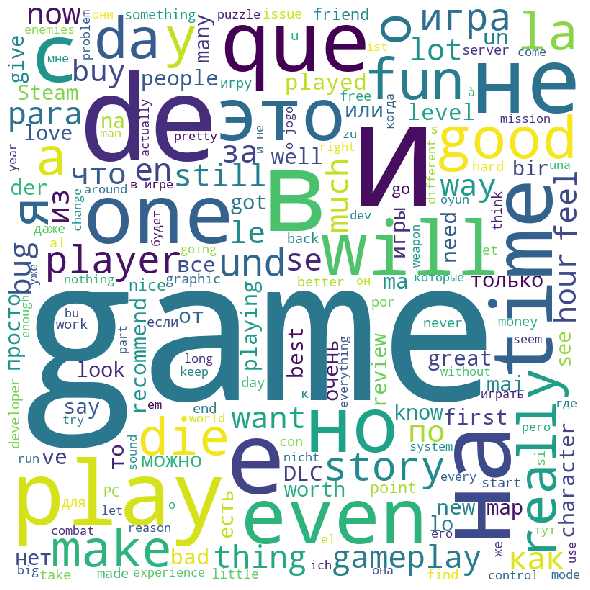

In [84]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(big_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [91]:
import pandas as pd
df = pd.read_csv('translated_data.csv')
X_trans = df.to_numpy()
X_trans = X_trans.flatten()

import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# custom punctuation filter does not include ':', '(' and ')' for emojis
PUNCTUATION = '!"#$%&\'*+,-./;<=>?@[\\]^_`{|}~'

def remove_punc(s):
    return "".join([char for char in s if char not in PUNCTUATION])

def remove_stopwords(tokens):
    stop_words = stopwords.words('english')
    return [word for word in tokens if word not in stop_words]

def stem(tokens):
    porter = PorterStemmer()
    return [porter.stem(word) for word in tokens]

# to lowercase
X_low = list(map(str.lower, X_trans))
X_punc = list(map(remove_punc, X_low))
X_tok = list(map(word_tokenize, X_punc))
X_stop = list(map(remove_stopwords, X_tok))

# Represent X_stemmed as a single list of documents as strings with space separated tokens
X_stemmed_flat = [' '.join(e for e in item) for item in X_stop]

In [92]:
big_string = ''
for x in X_stemmed_flat:
    big_string += x

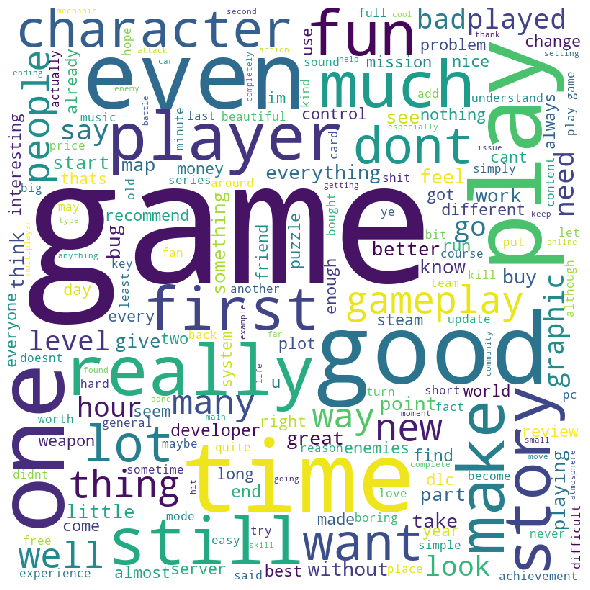

In [93]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(big_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [108]:
import numpy as np
X_splitted = [x.split() for x in X]
X_lens = [len(x) for x in X_splitted]
np.median(X_lens)

13.0

In [109]:
len(langs)

41